In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
!ls -lath data

total 8600
drwxr-xr-x  20 flatironschool  staff   640B Oct  8 14:27 ..
-rw-r--r--   1 flatironschool  staff    41K Oct  8 11:37 employment_state.csv
-rw-r--r--   1 flatironschool  staff   2.3M Oct  7 17:34 lookup_agency.csv
drwxr-xr-x  12 flatironschool  staff   384B Oct  7 17:34 .
-rw-r--r--   1 flatironschool  staff   164B Oct  7 17:34 lookup_region.csv
-rw-r--r--   1 flatironschool  staff   1.3K Oct  7 17:34 lookup_state.csv
-rw-r--r--   1 flatironschool  staff   172K Oct  7 17:34 offense_tkm_state.csv
-rw-r--r--   1 flatironschool  staff   300K Oct  7 17:34 offender_tkm_state.csv
-rw-r--r--   1 flatironschool  staff   125B Oct  7 16:54 lookup_offense_short.csv
-rw-r--r--   1 flatironschool  staff   462B Oct  7 16:54 lookup_offense_medium.csv
-rw-r--r--   1 flatironschool  staff   716K Oct  7 16:54 arrest_tkm_state.csv
-rw-r--r--   1 flatironschool  staff   638K Oct  7 14:31 victim_tkm_state.csv


In [17]:
employment_df = pd.read_csv('data/employment_state.csv')
offense_df = pd.read_csv('data/offense_tkm_state.csv')
arrest_df = pd.read_csv('data/arrest_tkm_state.csv')
offender_df = pd.read_csv('data/offender_tkm_state.csv')

In [4]:
employment_df.head()
employment_df.columns

Index(['agency_ct', 'civilian_ct', 'year', 'female_civilian_ct',
       'female_officer_ct', 'female_total_ct', 'male_civilian_ct',
       'male_officer_ct', 'male_total_ct', 'pe_ct_per_1000', 'population',
       'state_abbr', 'state_name', 'total_pe_ct'],
      dtype='object')

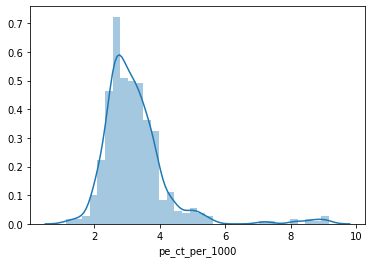

In [5]:
# distribution of police employment per 1000 people:
sns.distplot(employment_df.pe_ct_per_1000);

In [6]:
# is it a normally distributed variable at a 5% significane level?
statistic, p_value = stats.normaltest(employment_df.pe_ct_per_1000)

print(f'Statistic for normaltest: {statistic:.3f}, p_value of normaltest: {p_value:.3f}')


Statistic for normaltest: 303.152, p_value of normaltest: 0.000


In [7]:
#According to statistic, the distribution is not normally distributed

In [8]:
#removed the years before 2010
offense_df = offense_df.loc[offense_df.year>=2010]

In [9]:
#aggregate the offenses on state, year level
offense_df_aggr = offense_df.groupby(['state', 'year']).sum().reset_index()
offense_df_aggr.head(2)

,state,year,count
0,AL,2010,4524
1,AL,2011,4524


In [10]:
merged_df = pd.merge(offense_df_aggr, employment_df, left_on=['state', 'year'], right_on=['state_abbr', 'year'])

In [11]:
#renamed the column
merged_df.rename(columns={'count': 'offense_count'}, inplace=True)

In [12]:
merged_df.head()

,state,year,offense_count,agency_ct,civilian_ct,female_civilian_ct,female_officer_ct,female_total_ct,male_civilian_ct,male_officer_ct,male_total_ct,pe_ct_per_1000,population,state_abbr,state_name,total_pe_ct
0,AL,2010,4524,365,5424.0,3354.0,808.0,4162.0,2070.0,10434.0,12504.0,3.48,4792630,AL,Alabama,16666.0
1,AL,2011,4524,378,5701.0,3587.0,801.0,4388.0,2114.0,10668.0,12782.0,3.57,4815348,AL,Alabama,17170.0
2,AL,2012,4574,385,5806.0,3584.0,809.0,4393.0,2222.0,10400.0,12622.0,3.52,4834334,AL,Alabama,17015.0
3,AL,2013,5346,379,5818.0,3684.0,805.0,4489.0,2134.0,10681.0,12815.0,3.57,4845981,AL,Alabama,17304.0
4,AL,2014,4726,372,5655.0,3591.0,829.0,4420.0,2064.0,10613.0,12677.0,3.52,4861676,AL,Alabama,17097.0


In [13]:
merged_df['offense_rate'] = merged_df.offense_count / merged_df.population * 1000
merged_df.head()

,state,year,offense_count,agency_ct,civilian_ct,female_civilian_ct,female_officer_ct,female_total_ct,male_civilian_ct,male_officer_ct,male_total_ct,pe_ct_per_1000,population,state_abbr,state_name,total_pe_ct,offense_rate
0,AL,2010,4524,365,5424.0,3354.0,808.0,4162.0,2070.0,10434.0,12504.0,3.48,4792630,AL,Alabama,16666.0,0.943949
1,AL,2011,4524,378,5701.0,3587.0,801.0,4388.0,2114.0,10668.0,12782.0,3.57,4815348,AL,Alabama,17170.0,0.939496
2,AL,2012,4574,385,5806.0,3584.0,809.0,4393.0,2222.0,10400.0,12622.0,3.52,4834334,AL,Alabama,17015.0,0.946149
3,AL,2013,5346,379,5818.0,3684.0,805.0,4489.0,2134.0,10681.0,12815.0,3.57,4845981,AL,Alabama,17304.0,1.103182
4,AL,2014,4726,372,5655.0,3591.0,829.0,4420.0,2064.0,10613.0,12677.0,3.52,4861676,AL,Alabama,17097.0,0.972093


In [14]:
merged_df_2018 = merged_df.loc[merged_df.year==2018]

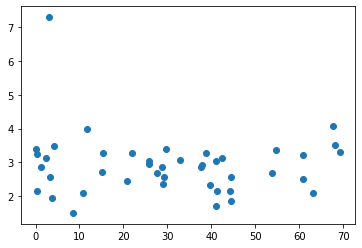

In [15]:
plt.scatter(merged_df_2018.offense_rate, merged_df_2018.pe_ct_per_1000)

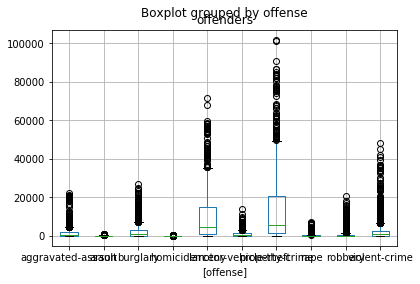

In [22]:
offender_df.boxplot(column=['offenders'], by=['offense'])

In [32]:
offender_df = pd.merge(offender_df, employment_df, how='left', left_on = ['state', 'year'], right_on= ['state_abbr', 'year'])

In [33]:
offender_df = offender_df.loc[:, ['state', 'year', 'gender', 'offenders', 'population', 'offense']]

In [35]:
offender_df['offender_ratio'] = offender_df.offenders/offender_df.population * 1000000

In [36]:
offender_df.head()

,state,year,gender,offenders,population,offense,offender_ratio
0,AL,2010,Male,13,4792630,aggravated-assault,2.712498
1,AL,2011,Male,11,4815348,aggravated-assault,2.284362
2,AL,2012,Male,15,4834334,aggravated-assault,3.102806
3,AL,2013,Male,21,4845981,aggravated-assault,4.333488
4,AL,2014,Male,25,4861676,aggravated-assault,5.142260


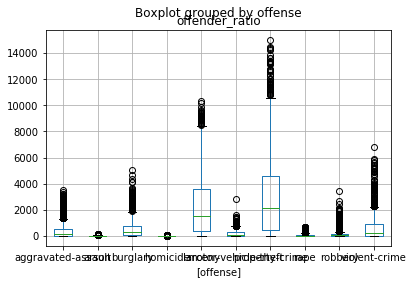

In [41]:
offender_df.boxplot(column=['offender_ratio'], by=['offense'])